# Chapter 4: Non-Daily Data

## Using monthly data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('../data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

c:\users\gregr\appdata\local\programs\python\python38\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


12:15:48 - cmdstanpy - INFO - Chain [1] start processing
12:15:48 - cmdstanpy - INFO - Chain [1] done processing


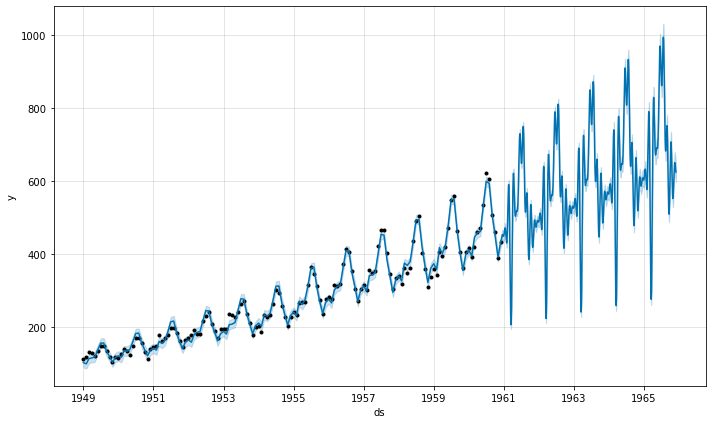

In [3]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

12:15:49 - cmdstanpy - INFO - Chain [1] start processing
12:15:49 - cmdstanpy - INFO - Chain [1] done processing


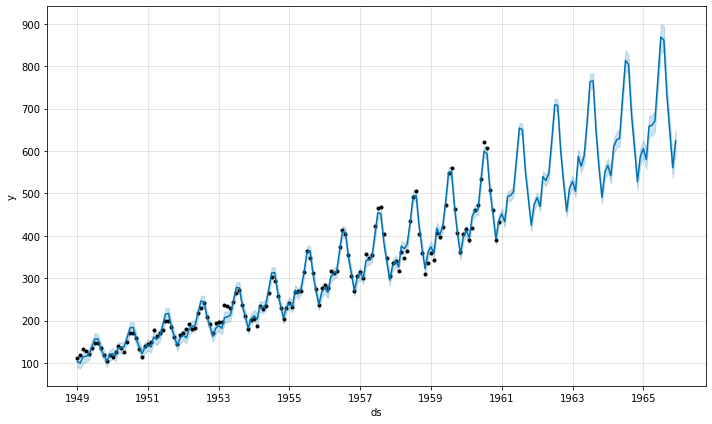

In [4]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 5, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

## Using sub-daily data

In [5]:
df = pd.read_csv('../data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

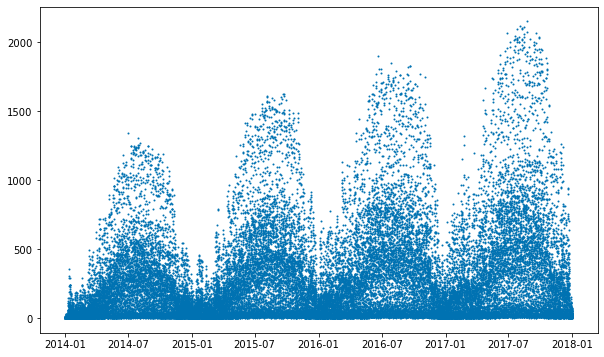

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

In [7]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')

12:16:01 - cmdstanpy - INFO - Chain [1] start processing
12:16:53 - cmdstanpy - INFO - Chain [1] done processing


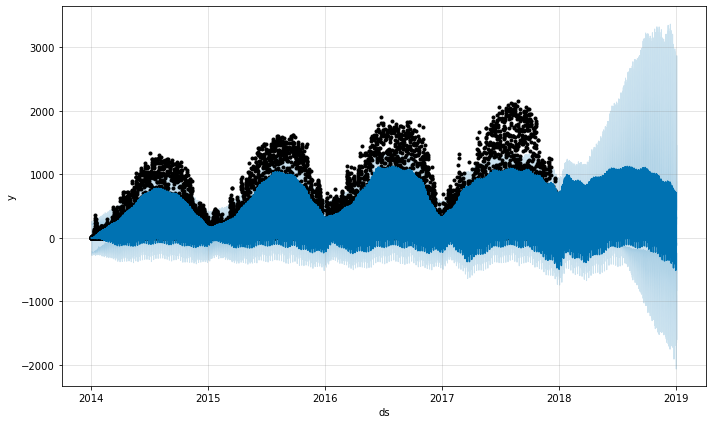

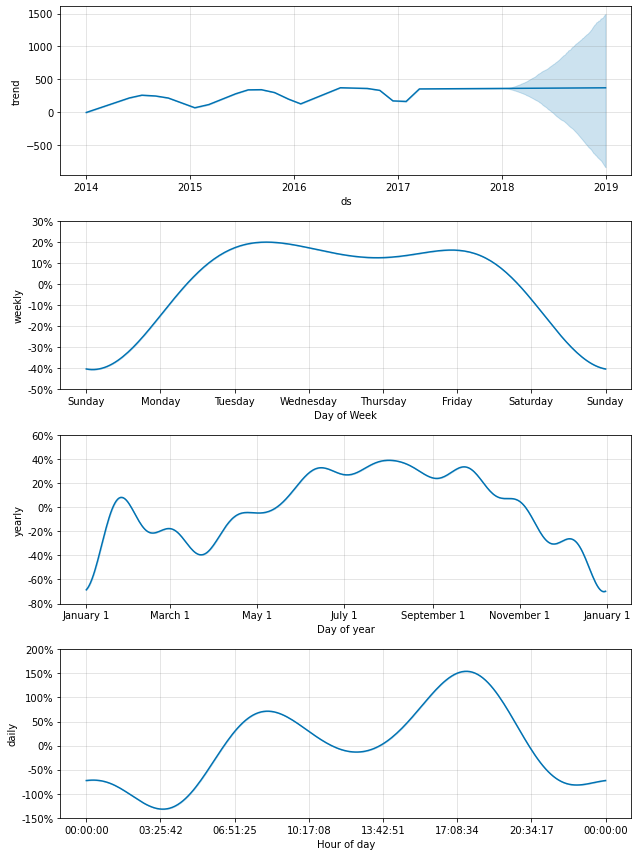

In [8]:
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

## Using data with regular gaps

In [9]:
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour < 18)]

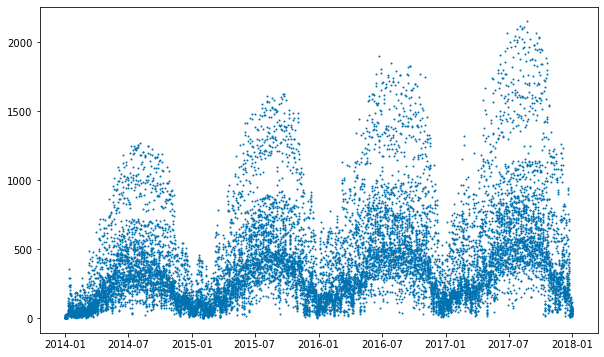

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

12:17:23 - cmdstanpy - INFO - Chain [1] start processing
12:18:00 - cmdstanpy - INFO - Chain [1] done processing


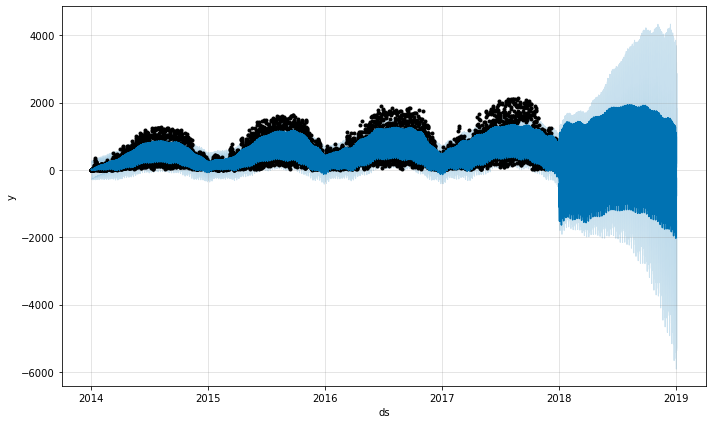

In [11]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

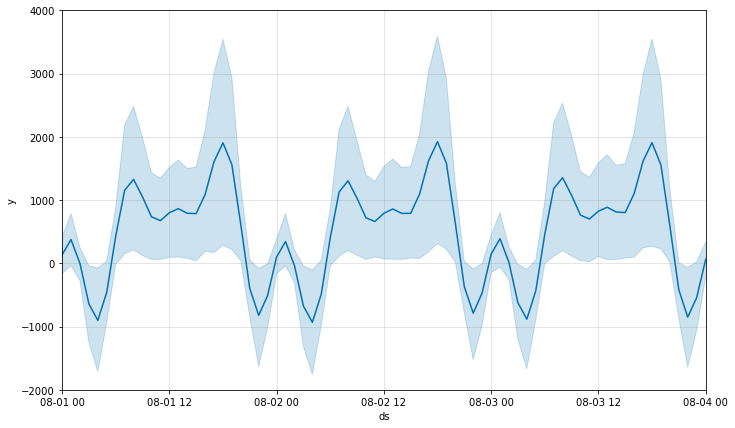

In [12]:
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

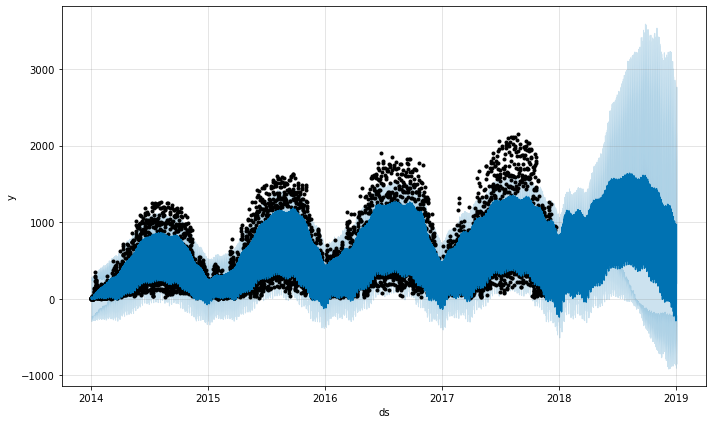

In [13]:
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]
forecast2 = model.predict(future2)
fig = model.plot(forecast2)
plt.show()

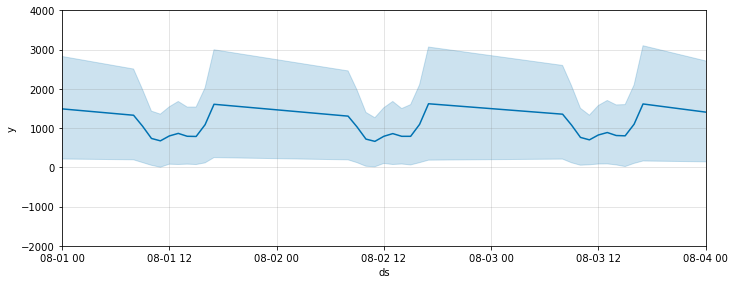

In [14]:
fig = model.plot(forecast2, figsize=(10, 4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

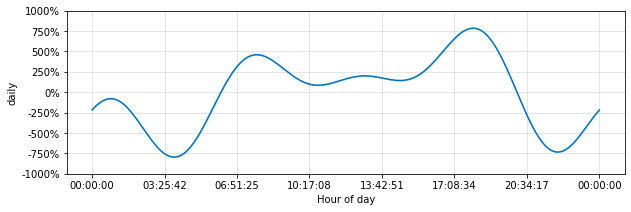

In [15]:
from prophet.plot import plot_seasonality
plot_seasonality(model, 'daily', figsize=(10, 3))
plt.show()